IT24102854 - KNN Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your final preprocessed dataset
df = pd.read_csv("heart_selected_features_final.csv")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Target distribution:\n", df['target'].value_counts())

X = df.drop('target', axis=1)
y = df['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Dataset shape: (229, 6)
Columns: ['exang', 'oldpeak', 'ca', 'thal_2', 'thal_3', 'target']
Target distribution:
 target
1    133
0     96
Name: count, dtype: int64
Features shape: (229, 5)
Target shape: (229,)


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
                           classification_report, roc_curve)
from sklearn.neighbors import KNeighborsClassifier #The KNN algorithm implementation
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Dataset is already loaded from previous code as 'df'
# Just use the existing 'df' variable

print("Dataset shape:", df.shape)
print("Class distribution:\n", y.value_counts())


Dataset shape: (229, 6)
Class distribution:
 target
1    133
0     96
Name: count, dtype: int64


In [3]:
# Preparing features and target
X = df.drop("target", axis=1)
y = df["target"]

print("Dataset shape:", X.shape)
print("Class distribution:\n", y.value_counts())

Dataset shape: (229, 5)
Class distribution:
 target
1    133
0     96
Name: count, dtype: int64


In [4]:
# Scale features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 183
Testing samples: 46


In [8]:
# Define consistent Cross Validation strategy
#5-fold: Data split into 5 equal parts
CV_STRATEGY = 5
cv = StratifiedKFold(n_splits=CV_STRATEGY, shuffle=True, random_state=42)

In [9]:
# Hyperparameter tuning for KNN
print("\n=== KNN Hyperparameter Tuning ===")
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11, 15, 20],
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring="f1",
    cv=CV_STRATEGY,
    n_jobs=-1,
    verbose=1
)

grid_knn.fit(X_train, y_train)
print("Best Parameters for KNN:", grid_knn.best_params_)
print("Best CV Score (F1):", grid_knn.best_score_)



=== KNN Hyperparameter Tuning ===
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best CV Score (F1): 0.8592011944755505


In [10]:
# Getting the tuned model
knn_model = grid_knn.best_estimator_

# Test set evaluation
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

print("\n=== KNN Performance (Test Set) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_proba_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['No Disease', 'Disease']))



=== KNN Performance (Test Set) ===
Accuracy: 0.8260869565217391
Precision: 0.8275862068965517
Recall: 0.8888888888888888
F1 Score: 0.8571428571428571
ROC AUC: 0.8235867446393762

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.82      0.74      0.78        19
     Disease       0.83      0.89      0.86        27

    accuracy                           0.83        46
   macro avg       0.83      0.81      0.82        46
weighted avg       0.83      0.83      0.82        46



<Figure size 800x600 with 0 Axes>

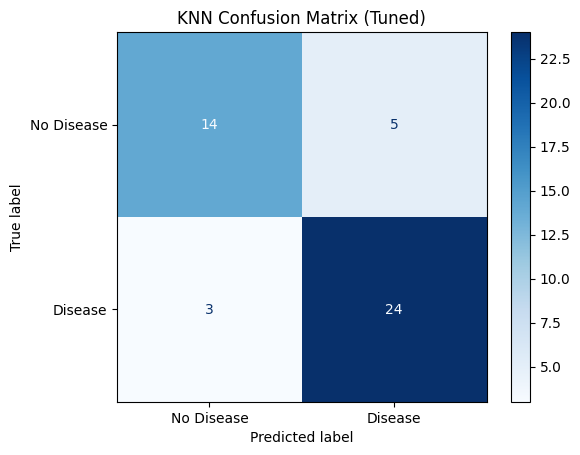

In [11]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn),
                       display_labels=['No Disease', 'Disease']).plot(cmap="Blues")
plt.title("KNN Confusion Matrix (Tuned)")
plt.show()

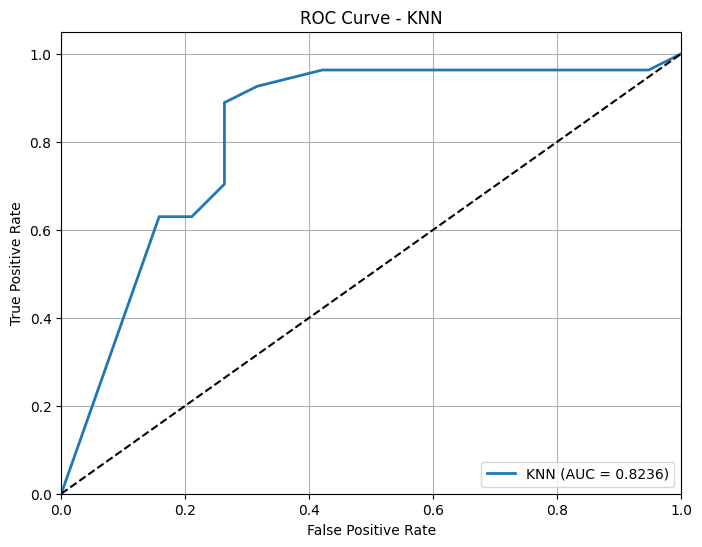

In [12]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
plt.plot(fpr, tpr, linewidth=2, label=f"KNN (AUC = {roc_auc_score(y_test, y_proba_knn):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


=== K-value Analysis ===


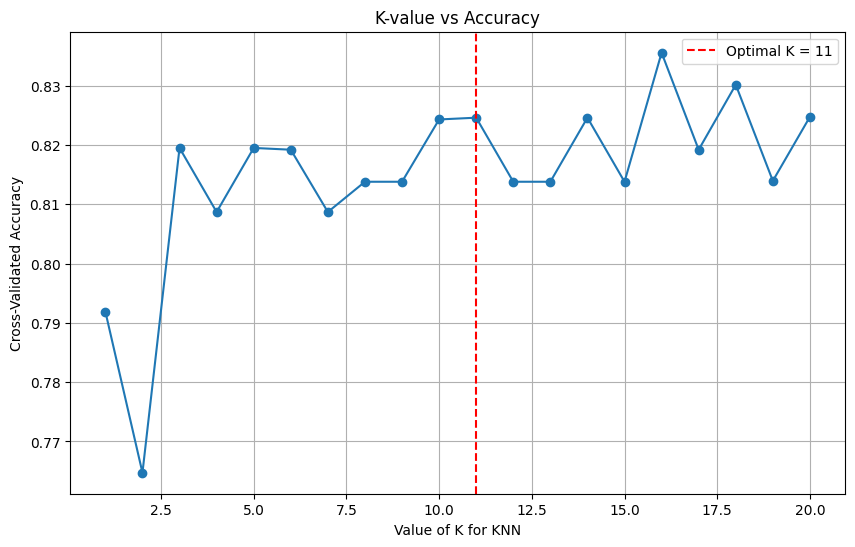

In [13]:
# K-value analysis
print("\n=== K-value Analysis ===")
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K-value vs Accuracy')
plt.grid(True)
plt.axvline(x=grid_knn.best_params_['n_neighbors'], color='red', linestyle='--',
            label=f'Optimal K = {grid_knn.best_params_["n_neighbors"]}')
plt.legend()
plt.show()

In [14]:
# Proper Cross-Validation
print("\n=== Proper Cross-Validation ===")
knn_fresh = KNeighborsClassifier(**grid_knn.best_params_)
knn_cv_scores = cross_val_score(knn_fresh, X_train, y_train, cv=cv, scoring="f1")

print("KNN CV F1 Scores:", knn_cv_scores.round(4))
print("KNN Mean CV F1:", knn_cv_scores.mean().round(4), "+/-", (knn_cv_scores.std() * 2).round(4))


=== Proper Cross-Validation ===
KNN CV F1 Scores: [0.8571 0.7347 0.9767 0.7727 0.8372]
KNN Mean CV F1: 0.8357 +/- 0.1662


In [15]:
# Overfitting analysis
train_pred = knn_model.predict(X_train)
test_pred = y_pred_knn

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
accuracy_gap = abs(train_accuracy - test_accuracy)

print(f"\nOverfitting Analysis:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:  {test_accuracy:.4f}")
print(f"Accuracy Gap:   {accuracy_gap:.4f}")

if accuracy_gap > 0.05:
    print("--- POTENTIAL OVERFITTING ---")
else:
    print("--- GOOD GENERALIZATION ---")


Overfitting Analysis:
Train Accuracy: 0.8361
Test Accuracy:  0.8261
Accuracy Gap:   0.0100
--- GOOD GENERALIZATION ---


In [16]:
# Save the model and scaler
import joblib
joblib.dump(knn_model, 'knn_model.pkl')
joblib.dump(scaler, 'knn_scaler.pkl')
print("\n✓ KNN model saved as 'knn_model.pkl'")
print("✓ Scaler saved as 'knn_scaler.pkl'")


✓ KNN model saved as 'knn_model.pkl'
✓ Scaler saved as 'knn_scaler.pkl'
